In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
#importando dados
dado = pd.read_csv('Iris.csv')
dado.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dado.shape

(150, 6)

In [ ]:
dado['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dado.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
fig = px.scatter(dado, x="SepalLengthCm", y="SepalWidthCm", color = 'Species')
fig.update_traces(marker=dict(size=15), opacity=1)
fig.update_layout(height=600, width=900, title_text="SepalLength(cm) X SepalWidth(cm)")
fig.show()

In [ ]:
fig = px.scatter(dado, x="PetalLengthCm", y="PetalWidthCm", color = 'Species')
fig.update_traces(marker=dict(size=15), opacity=1)
fig.update_layout(height=600, width=900, title_text="PetalLength(cm) X PetalWidth(cm)")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2)
fig.add_histogram(x=dado["SepalLengthCm"],row=1, col=1)
fig.add_histogram(x=dado["SepalWidthCm"],row=2, col=1)
fig.add_histogram(x=dado["PetalLengthCm"],row=1, col=2)
fig.add_histogram(x=dado["PetalWidthCm"],row=2, col=2)
fig.update_xaxes(title_text="SepalLengthCm", row=1, col=1)
fig.update_xaxes(title_text="SepalWidthCm", row=2, col=1)
fig.update_xaxes(title_text="PetalLengthCm", row=1, col=2)
fig.update_xaxes(title_text="PetalWidthCm", row=2, col=2)
fig.update_layout(height=600, width=1000, title_text="Histogram")
fig.show()

In [ ]:
x = dado.drop(['Species', 'Id'], axis=1).values
y = dado['Species'].values
x[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# Modelos de Machine Learning

from sklearn.svm import SVC

# Para treino e teste
from sklearn.model_selection import train_test_split

# Para a validação
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
repkfoldR = RepeatedKFold( n_splits=5, n_repeats=10, random_state=17)
modeloSVM = SVC(kernel='linear', C=1.0, random_state=5)
print(f" SVM : {cross_val_score(modeloSVM, x_treino, y_treino, cv = repkfoldR).mean()}")

 SVM : 0.98


In [ ]:
modeloSVM.fit(x_treino, y_treino)
previsoes = modeloSVM.predict(x_teste)
previsoes

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [ ]:
comp = pd.DataFrame(previsoes, columns=['previsto'])
comp['real'] = y_teste
comp.head()

,previsto,real
0,Iris-virginica,Iris-versicolor
1,Iris-virginica,Iris-virginica
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(comp['real'], comp['previsto'])

0.9666666666666667

In [ ]:
#função cria matriz de confusão usando seaborn
def Confusion_Matrix(cm, classes):
  mask = np.triu(np.ones_like(cm, dtype=bool))
  f, ax = plt.subplots(figsize=(11, 9))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(cm, cmap='mako',
  square=True, annot=True, linewidths=.5, xticklabels=classes, yticklabels=classes, cbar_kws={"shrink": .5}, annot_kws={"size":15})
  plt.ylabel('True Label', fontsize= '20', fontweight= 'bold', labelpad=20)
  plt.xlabel('Predicted label', fontsize= '20', fontweight= 'bold', labelpad=20)
  plt.xticks(fontweight= 'bold')
  plt.yticks(fontweight= 'bold')
  plt.title('Confusion Matrix', fontdict={'fontsize': 25, 'fontweight' : 500}, pad=50)
  plt.show()

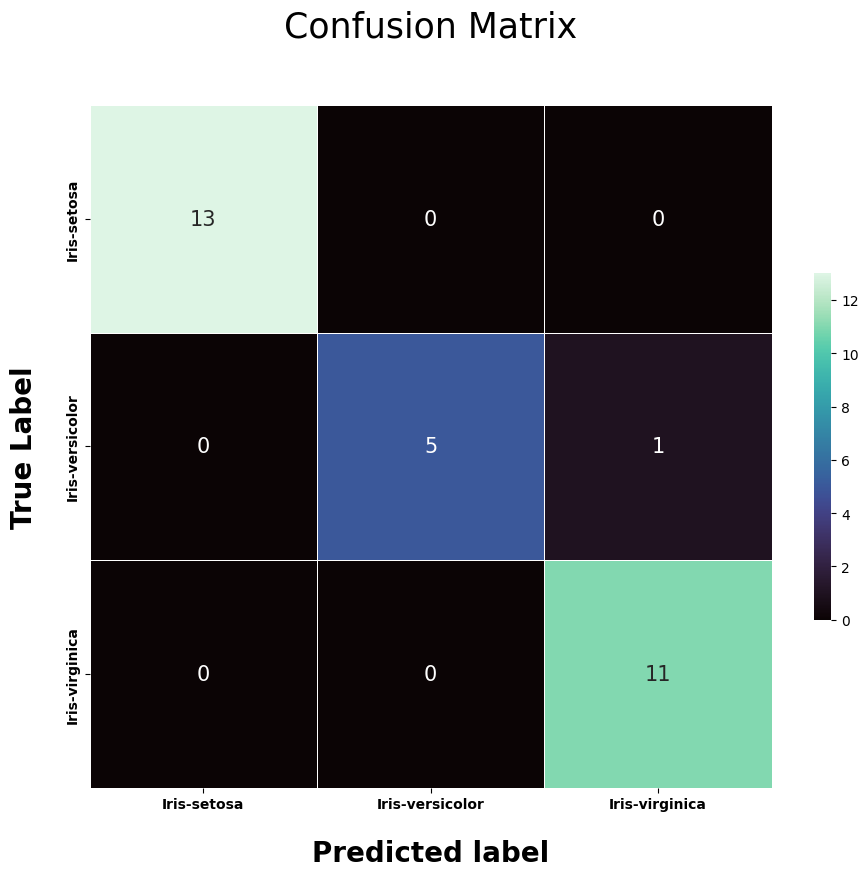

In [ ]:
cm = confusion_matrix(comp['real'], comp['previsto'])
classes = list(dado['Species'].unique())
Confusion_Matrix(cm, classes)

In [ ]:
print(classification_report(comp['real'], comp['previsto']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

